<a href="https://colab.research.google.com/github/SaiGuru24/Deep-LearningImage-recognition-/blob/main/Deep_Learning_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
import pathlib


from PIL import Image
from pathlib import Path
from tensorflow.keras import layers,models

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Update the path to the "vehicle_photos" folder in your Google Drive
loaded_data = Path("/content/drive/My Drive/DL")

# Initialize a counter to keep track of the total number of images
total_image_count = 0

# Check if there are any subfolders (flower categories)
vehicle_categories = list(loaded_data.glob('*'))
if len(vehicle_categories) > 0:
    for vehicle_category in vehicle_categories:
        vehicle_images = list(vehicle_category.glob('*.jpg')) + list(vehicle_category.glob('*.png')) + list(vehicle_category.glob('*.jpeg'))
        if len(vehicle_images) > 0:
            total_image_count += len(vehicle_images)
    print(f"Total number of vehicle images found: {total_image_count}")
else:
    print("No vehicle categories (subfolders) found in the directory.")

set_height, set_width = 180, 180
batch_size=32

Total number of vehicle images found: 1766


In [ ]:
#Training Setup
training_images = tf.keras.preprocessing.image_dataset_from_directory(
    loaded_data,
    subset="training",
    validation_split = 0.25,
    seed=18,
    image_size=(set_height, set_width),
    batch_size=batch_size
)
validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    loaded_data,
    subset="validation",  # Use "validation" for the validation subset
    validation_split=0.25,  # Adjust this value as needed
    seed=18,
    image_size=(set_height, set_width),
    batch_size=batch_size
)
vehicle_classes = training_images.class_names
print(vehicle_classes)
dataset_classes = 2
from tensorflow.keras.models import Sequential
model=Sequential([])

Found 1766 files belonging to 2 classes.
Using 1325 files for training.
Found 1766 files belonging to 2 classes.
Using 441 files for validation.
['Bikes', 'Cars']


In [ ]:
import matplotlib.pyplot as plt

def create_cnn_model(dropout_rate):
    model = Sequential([
        layers.experimental.preprocessing.Rescaling(1./255, input_shape=(set_height, set_width, 3)),
        layers.Conv2D(16, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64, 3, padding='same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),  # Add dropout layer with the specified rate
        layers.Dense(dataset_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    return model


In [ ]:
#Define a list of dropout rates to try
dropout_rates = [0.0, 0.2, 0.4]
epochs=10
# Store training history for each model
training_histories = []

# Train models with different dropout rates
for dropout_rate in dropout_rates:
    print(f"Training model with dropout rate: {dropout_rate}")
    model = create_cnn_model(dropout_rate)
    history = model.fit(
        training_images,
        validation_data=validation_images,
        epochs=epochs
    )
    training_histories.append((dropout_rate,history))

Training model with dropout rate: 0.0
Epoch 1/10
42/42 [==============================] - 51s 1s/step - loss: 0.6316 - accuracy: 0.7155 - val_loss: 0.2747 - val_accuracy: 0.8866
Epoch 2/10
42/42 [==============================] - 51s 1s/step - loss: 0.1922 - accuracy: 0.9245 - val_loss: 0.2337 - val_accuracy: 0.9048
Epoch 3/10
42/42 [==============================] - 49s 1s/step - loss: 0.1092 - accuracy: 0.9653 - val_loss: 0.2026 - val_accuracy: 0.9297
Epoch 4/10
42/42 [==============================] - 50s 1s/step - loss: 0.0432 - accuracy: 0.9834 - val_loss: 0.0654 - val_accuracy: 0.9773
Epoch 5/10
42/42 [==============================] - 55s 1s/step - loss: 0.0405 - accuracy: 0.9894 - val_loss: 0.1363 - val_accuracy: 0.9615
Epoch 6/10
42/42 [==============================] - 55s 1s/step - loss: 0.0282 - accuracy: 0.9909 - val_loss: 0.1110 - val_accuracy: 0.9683
Epoch 7/10
42/42 [==============================] - 50s 1s/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0653 - val

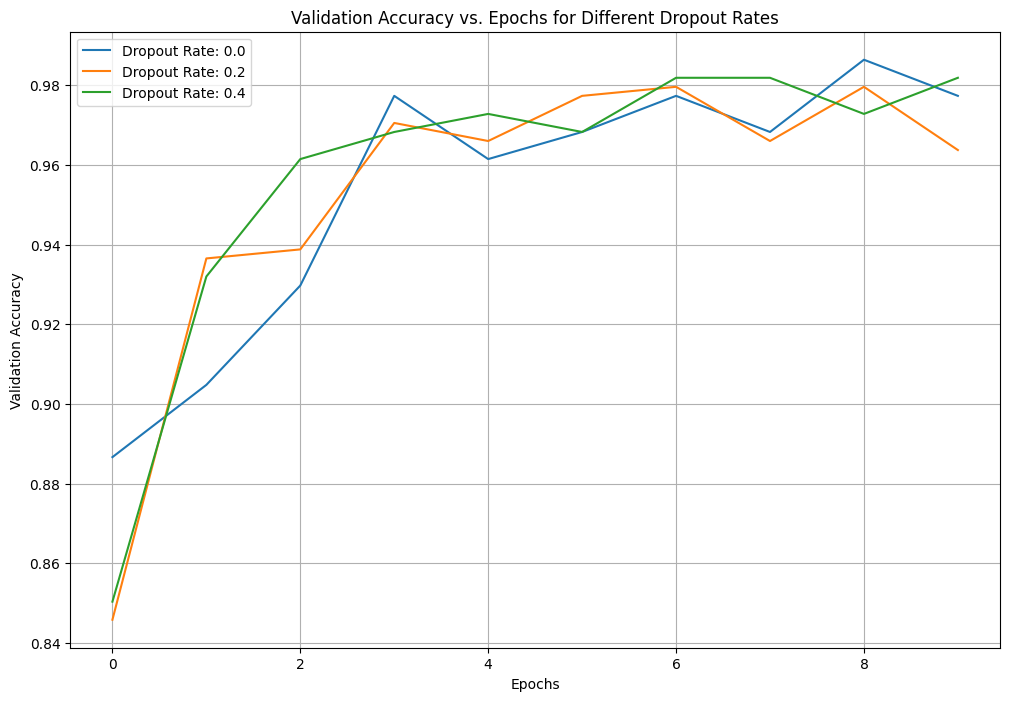

In [ ]:
# Visualize the training history for different dropout rates
plt.figure(figsize=(12, 8))
for dropout_rate, history in training_histories:
    plt.plot(history.history['val_accuracy'], label=f'Dropout Rate: {dropout_rate}')
plt.title('Validation Accuracy vs. Epochs for Different Dropout Rates')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
op_model = create_cnn_model(0.4)
epochs=10

CNN_model2 = op_model.fit(
  training_images,
  validation_data=validation_images,
  epochs=epochs
)

Epoch 1/10
42/42 [==============================] - 60s 1s/step - loss: 0.5935 - accuracy: 0.7072 - val_loss: 0.2984 - val_accuracy: 0.8844
Epoch 2/10
42/42 [==============================] - 51s 1s/step - loss: 0.2011 - accuracy: 0.9260 - val_loss: 0.1492 - val_accuracy: 0.9410
Epoch 3/10
42/42 [==============================] - 53s 1s/step - loss: 0.1206 - accuracy: 0.9615 - val_loss: 0.0889 - val_accuracy: 0.9546
Epoch 4/10
42/42 [==============================] - 56s 1s/step - loss: 0.0647 - accuracy: 0.9758 - val_loss: 0.1793 - val_accuracy: 0.9365
Epoch 5/10
42/42 [==============================] - 51s 1s/step - loss: 0.0458 - accuracy: 0.9857 - val_loss: 0.0826 - val_accuracy: 0.9751
Epoch 6/10
42/42 [==============================] - 57s 1s/step - loss: 0.0306 - accuracy: 0.9894 - val_loss: 0.1134 - val_accuracy: 0.9637
Epoch 7/10
42/42 [==============================] - 56s 1s/step - loss: 0.0197 - accuracy: 0.9940 - val_loss: 0.0659 - val_accuracy: 0.9773
Epoch 8/10
42/42 [==

In [ ]:
def predict_input_image(img):
  img_4d=img.reshape(-1,180,180,3)
  prediction=model.predict(img_4d)[0]
  print(model.predict(img_4d)[0])
  return {vehicle_classes[i]: float(prediction[i]) for i in range(2)}

In [ ]:
# Evaluate the model on validation data
val_accuracy=CNN_model2.history['val_accuracy'][-1]
print(f"Validation accuracy with dropout rate {dropout_rate}: {val_accuracy}")

Validation accuracy with dropout rate 0.4: 0.9659863710403442


In [ ]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 6.6 MB/s eta 0:

In [ ]:
import gradio as gr

In [ ]:
image = gr.inputs.Image(shape=(180,180))

label = gr.outputs.Label(num_top_classes=5)

gr.Interface(fn=predict_input_image, inputs=image, outputs=label,interpretation='default').launch(debug='True',share=True)

<ipython-input-25-70d8e7926d97>:1: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  image = gr.inputs.Image(shape=(180,180))
<ipython-input-25-70d8e7926d97>:1: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  image = gr.inputs.Image(shape=(180,180))
<ipython-input-25-70d8e7926d97>:3: GradioDeprecationWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  label = gr.outputs.Label(num_top_classes=5)
<ipython-input-25-70d8e7926d97>:3: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'auto'}
  label = gr.outputs.Label(num_top_classes=5)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://7bfb9bfaa0f944bb16.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 50ms/step
[4.6646442e-09 1.0000000e+00]
Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://7bfb9bfaa0f944bb16.gradio.live


In [ ]:
# Save the best model to a file
model.save('/content/drive/My Drive/DL/best_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
